# 🏃‍♀️ Quickstart

Use [Relevance AI](https://cloud.relevance.ai/) for clustering and gaining meaning from your unstructured data.

## ✨ Example

An example cluster app that showcases meaning amongst each group of unstructured data 
With just a few lines of code,
you'll get rich, interactive, shareable dashboards [which you can see yourself here](https://i.gyazo.com/55a026bfe8e3becf06e7fceed4e146f2.png).
![](https://i.gyazo.com/55a026bfe8e3becf06e7fceed4e146f2.png) 


### 🔒 Data & Privacy

We take security very seriously, and our cloud-hosted dashboard uses industry standard best practices for encryption. Our team adhere to our [strict privacy policy](https://relevance.ai/data-security-policy/).

---

### 🪄 Install `RelevanceAI` library and authenticate the client

Start by installing the library and logging in to your account.

In [ ]:
!pip install RelevanceAI -qqq

In [1]:
In [1]: %load_ext autoreload

In [2]: %autoreload 2

In [ ]:
from relevanceai import Client

# Instantiate the client and authenticate
client = Client()

# This will prompt a link to collect your API token which includes your project and API key

### 📩 Upload Some Data
1️⃣. Open a new **Dataset**

2️⃣. **Insert** some documents

In [1]:
from relevanceai.utils import example_documents

documents = example_documents("retail_reviews_small", number_of_documents=100)

In [3]:
dataset_id = "retail_reviews"  
# The dataset name that we have decided, this can be whatever you want for your own data
dataset = client.Dataset(dataset_id=dataset_id)  
# Instantiate the dataset

In [5]:
dataset.insert_documents(documents)

while inserting, you can visit monitor the dataset at https://cloud.relevance.ai/dataset/retail_reviews/dashboard/monitor/
✅ All documents inserted/edited successfully.


You can view your dataset quickly using `dataset.head` just like in Pandas!

In [7]:
dataset.head()

https://cloud.relevance.ai/dataset/retail_reviews/dashboard/data?page=1


,Unnamed: 0,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,insert_date_,_id
0,1408,AVpjEN4jLJeJML43rpUe,"Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,",B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets","841667103143,0841667103143,brandnewamazonkindlefire16gb7ipsdisplaytabletwifi16gbblue/5025500,brandnewamazonkindlefire16gb7ipsdisplaytabletwifi16gbblue/b018y225ia,brandnewamazonkindlefire16gb7ipsdisplaytabletwifi16gbblue/201625338826,brandnewamazonkindlefire16gb7ipsdisplaytabletwifi16gbblue/362123960192,amazon/b018y225ia",Amazon,2017-05-18T00:00:00.000Z,None,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017-06-07T00:00:00Z,2017-07-08T00:00:00Z,2017-08-06T00:00:00Z,2017-08-19T00:00:00Z",None,True,None,0,5,"http://reviews.bestbuy.com/3545/5025500/reviews.htm?format=embedded&page=15,http://reviews.bestbuy.com/3545/5025500/reviews.htm?format=embedded&page=14,http://reviews.bestbuy.com/3545/5025500/reviews.htm?format=embedded&page=3,http://reviews.bestbuy.com/3545/5025500/reviews.htm?format=embedded&page=11",I bought this for my daughter for Christmas. I could set her as a user and make it safe for her age. I downloaded books and apps with ease. I'm glad that she is loving her Fire.,Amazon Fire,None,None,Renessa14,2022-06-07T01:32:23.307Z,00003142-ef66-39df-a84a-2f652c4c3e1c
1,563,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All Tablets,Electronics, Tech Toys, Movies, Music,Electronics,iPad & Tablets,Android Tablets,Frys","firetablet7displaywifi8gbincludesspecialoffersmagenta/5025800,841667103105,0841667103105,amazon/b018y229ou,firetablet7displaywifi8gbincludesspecialoffersmagenta/b018y229ou",Amazon,2016-04-16T00:00:00.000Z,2017-05-21T01:18:21Z,"2017-04-30T00:08:00.000Z,2017-06-07T08:18:00.000Z",None,True,None,1,5,"http://reviews.bestbuy.com/3545/5025800/reviews.htm?format=embedded&page=767,http://reviews.bestbuy.com/3545/5025800/reviews.htm?format=embedded&page=800",This was a gift for a senior citizen that is not a fan of computers and technology. After just a few minutes of instruction she picked right up on how much fun she could have with her down loaded games and she also learned how to reach out on the internet for information on subjects that interest her. She is very happy with her gift!,Great tablet for first time user,None,None,donfield,2022-06-07T01:32:23.307Z,00088906-e56b-3507-8300-d9205d0bee23
2,313,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All Tablets,Electronics, Tech Toys, Movies, Music,Electronics,iPad & Tablets,Android Tablets,Frys","firetablet7displaywifi8gbincludesspecialoffersmagenta/5025800,841667103105,0841667103105,amazon/b018y229ou,firetablet7displaywifi8gbincludesspecialoffersmagenta/b018y229ou",Amazon,2016-01-08T00:00:00.000Z,2017-05-21T02:00:31Z,"2017-04-30T00:14:00.000Z,2017-06-07T08:13:00.000Z",None,True,None,0,4,"http://reviews.bestbuy.com/3545/5025800/reviews.htm?format=embedded&page=1049,http://reviews.bestbuy.com/3545/5025800/reviews.htm?format=embedded&page=1083","NICE TABLET, BUT IT WANTS YOU TO PUT ALL YOUR BILLING INFORMATION IN AND A CREDIT CARD TO DO ALL PURCHASES. IS A HASSLE TO PULL UP PROGRAMS BECAUSE OF THIS. GOOD FOR A CHILD.",NICE TABLET FOR CHILDREN,None,None,FASTJAKE,2022-06-07T01:32:23.307Z,0012542b-3e5a-31e5-9cf3-0100f64666ae
3,4752,AVpfl8cLLJeJML43AE3S,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Docks & Mini Speakers,Amazon Echo Accessories,Kitchen & Dining Features,Speaker 

## 👨‍🔬 Vectorizing

💪 In order to better visualise clusters within our data, we must vectorise the unstructured fields in a our clusters. In this dataset, there are two important text fields, both located in the review body; These are the `reviews.text` and `reviews.title`. For the purposes of this tutorial, we will be vectorizing `reviews.text` only.

### 🤔 Choosing a Vectorizer

An important part of vectorizing text is around choosing which vectorizer to use. Relevance AI allows for a custom vectorizer from vectorhub, but if you can't decide, the default models for each type of unstructured data are listed below.

- Text: `USE2Vec`
- Images: `Clip2Vec`

First we install the suite of vectorizers from vectorhub

In [9]:
# !pip install vectorhub[encoders-text-tfhub] -qqq

### 🤩 Vectorize in one line

We support vectorizing text in just 1 line.

In [ ]:
# The text fields here are the ones we wish to construct vector representations for
text_fields = ["reviews.text"]
dataset.vectorize_text(fields=text_fields)

## ✨ Cluster Application

In one line of code, we can create a cluster application based on our new vector field. This application is how we will discover insights about the semantic groups in our data.

### 🤔 Choosing the Number of Clusters

Most clustering algorithms require you choose the number clusters you wish to find. This can be tricky if you don't know what the expect. Luckily, RelevanceAI uses a clustering algorithm called community detection that does not require the number of clusters to be set. Instead, the algorithm will decide how many is right for you. To discover more about other clustering methods, [read here](https://relevanceai.readthedocs.io/en/latest/relevanceai.cluster_report.html)

First, let us see what vector fields are availbale in the dataset.

In [11]:
dataset.list_vector_fields()

['reviews.text_all-mpnet-base-v2_vector_']

In [1]:
model = "kmeans"
number_of_clusters = 20
alias = "my_clustering"
vector_fields = dataset.list_vector_fields()
dataset.cluster(vector_fields=vector_fields, model=model, alias=alias)

### 🔗 The above step will produce a link to your first cluster app!

Click the link provided to view your newly generated clusters in a [dashboard app](https://cloud.relevance.ai/dataset/retail_reviews/deploy/cluster/59066979f4876d91beea/QVdEaHJuOEJ5Qy1VVnVsVDhndjM6eG9HaVg2RGtTTUdWNXFFQjNhZUg0QQ/LZpGq38B8_iiYmskWDEn/us-east-1/) ![](https://i.gyazo.com/55a026bfe8e3becf06e7fceed4e146f2.png)

## Search Application

You can also build a search application in just 1 line of code.

This search application can be built by using

In [4]:
dataset.launch_search_app()

https://cloud.relevance.ai/dataset/retail_reviews/deploy/recent/search


You can view an example of our text search below.

![Text Search](text-search-gif.gif)

## 🌹 Extract Sentiment

You can add sentiment to your dataset. After adding sentiment

In [ ]:
dataset.extract_sentiment(text_fields=["reviews.text"]

## 🏷️ Add Labels To Your Dataset

Labelling refers to when you apply a vector search from one tag to another.

In [21]:
labels = [{"label": "Furniture", "label": "Home office", "label": "Electronics"}]

In [50]:
label_dataset.insert_documents(labels)

while inserting, you can visit monitor the dataset at https://cloud.relevance.ai/dataset/retail-label/dashboard/monitor/
✅ All documents inserted/edited successfully.


In [ ]:
# Vectorize like you would with a normal dataset
label_dataset.vectorize_text(
    fields=['label'], 
    output_fields=["label_vector_"]
)

In [ ]:
dataset.label_from_dataset(
    vector_fields=dataset.list_vector_fields(), 
    label_dataset=label_dataset
)

You can now see the labels on your dataset on Relevance AI.

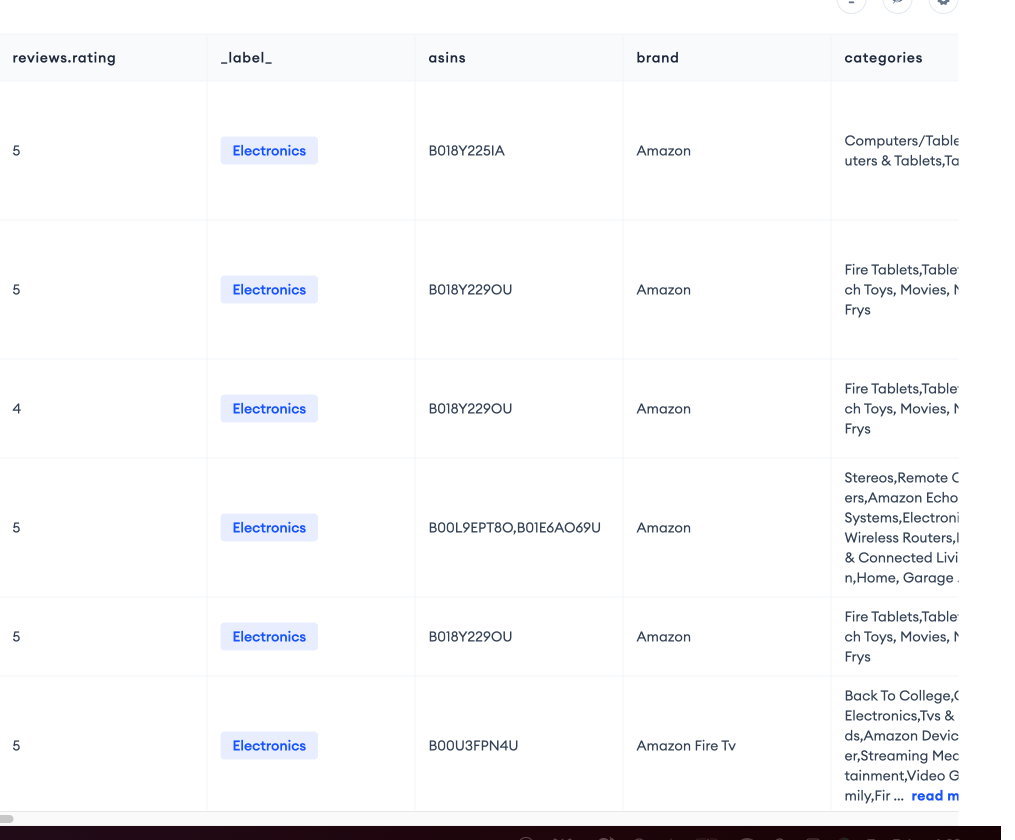



Want to quickly create some example applications with Relevance AI? Check out some other guides below!
- [Text-to-image search with OpenAI's CLIP](https://docs.relevance.ai/docs/quickstart-text-to-image-search)
- [Hybrid Text search with Universal Sentence Encoder using Vectorhub](https://docs.relevance.ai/docs/quickstart-text-search)
- [Text search with Universal Sentence Encoder Question Answer from Google](https://docs.relevance.ai/docs/quickstart-question-answering)